In [ ]:
library(shiny)
ui <- fluidPage(
  selectInput(inputId = "indep_var", label = "Independent variable:", 
              choices = names(mtcars), selected = "wt"),
  selectInput(inputId = "dep_var", label = "Dependent variable:", 
              choices = names(mtcars), selected = "mpg"),
  plotOutput(outputId = "plot")
)

server <- function(input, output) {
  output$plot <- renderPlot({
    model <- lm(formula = paste(input$dep_var, "~", input$indep_var), data = mtcars)
    plot(model, col = "blue")
  })
}

shinyApp(ui=ui, server=server)

In [3]:
df <- read.csv('가구.csv')

In [5]:
head(df)

,가구원수,취업인원수,가구주_연령,비동거취업미혼자녀수,비동거학업미혼자녀수,비동거기타미혼자녀수,자동차보유대수,월세평가금액,전세보증금,월세사글세,주거용전용면적,주택소유유무,가계지출금액,가계지출_소비지출금액
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1,0,105,0,0,0,0,78,3500,43,26,2,600186,600186
2,1,0,18,0,0,0,0,450,60000,0,23,2,510527,510527
3,1,0,18,0,0,0,0,560,2000,550,33,2,2450278,2425278
4,1,0,19,0,0,0,0,330,3000,300,32,2,2608172,2593385
5,1,0,19,0,0,0,0,73,2500,48,26,2,927564,927564
6,1,0,20,0,0,0,0,100,20000,0,40,2,498771,493771


In [6]:
names(df)

[1] "가구원수"              "취업인원수"            "가구주_연령"          
 [4] "비동거취업미혼자녀수"  "비동거학업미혼자녀수"  "비동거기타미혼자녀수" 
 [7] "자동차보유대수"        "월세평가금액"          "전세보증금"           
[10] "월세사글세"            "주거용전용면적"        "주택소유유무"         
[13] "가계지출금액"          "가계지출_소비지출금액"

In [7]:
max(df$전세보증금)

[1] 1190000

In [13]:
df <- read.csv('가구동향.csv')

# 컬럼명에서 가계지출_소비지출_ 뒤의 단어만 추출하여 변수에 저장
col_names <- colnames(df)
col_suffix <- sub('.*가계지출_소비지출_(.*)', '\\1', col_names)

# 단어별로 그룹화하여 파이차트 그리기
word_list <- unique(col_suffix)
for (word in word_list) {
  selected_cols <- grep(paste0(word, '$'), col_names)
  if (length(selected_cols) == 0) {
    next
  }
  selected_df <- df[, selected_cols]
  if (ncol(selected_df) == 1) {
    selected_df <- matrix(selected_df, ncol = 1)
  }
  total <- colSums(selected_df)
  pie(total, labels = colnames(selected_df), 
      main = paste0(word, ' 구성비'), col = rainbow(length(total)), cex = 0.8)
}

ERROR: Error in if (ncol(selected_df) == 1) {: argument is of length zero


In [ ]:
df <- read.csv('가구동향.csv')

# 컬럼명에서 가계지출_소비지출_ 뒤의 단어만 추출하여 변수에 저장
col_names <- colnames(df)
col_suffix <- sub('.*가계지출_소비지출_(.*)', '\\1', col_names)

# 단어별로 그룹화하여 파이차트 그리기
word_list <- unique(col_suffix)
for (word in word_list) {
  selected_cols <- grep(paste0(word, '$'), col_names)
  if (length(selected_cols) == 0) {
    next
  }
  selected_df <- df[, selected_cols]
  if (is.null(dim(selected_df))) {
    selected_df <- data.frame(selected_df)
  }
  total <- colSums(selected_df)
  pie(total, labels = colnames(selected_df), 
      main = paste0(word, ' 구성비'), col = rainbow(length(total)), cex = 0.8)
}

In [29]:
margin.table(df[,15:133])

ERROR: Error in margin.table(df[, 15:133]): 'x' is not an array


In [28]:
names(df)[15:133]

[1] "가계지출_소비지출_식료품비주류음료구입비"                       
  [2] "가계지출_소비지출_식료품비주류음료_곡물구입비"                  
  [3] "가계지출_소비지출_식료품비주류음료_곡물가공품구입비"            
  [4] "가계지출_소비지출_식료품비주류음료_빵떡류구입비"                
  [5] "가계지출_소비지출_식료품비주류음료_육류구입비"                  
  [6] "가계지출_소비지출_식료품비주류음료_육류가공품구입비"            
  [7] "가계지출_소비지출_식료품비주류음료_신선수산동물구입비"          
  [8] "가계지출_소비지출_식료품비주류음료_염건수산동물구입비"          
  [9] "가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비"      
 [10] "가계지출_소비지출_식료품비주류음료_유제품알구입비"              
 [11] "가계지출_소비지출_식료품비주류음료_유지류구입비"                
 [12] "가계지출_소비지출_식료품비주류음료_과일가공품구입비"            
 [13] "가계지출_소비지출_식료품비주류음료_채소가공품구입비"            
 [14] "가계지출_소비지출_식료품비주류음료_해조가공품구입비"            
 [15] "가계지출_소비지출_식료품비주류음료_당류과자류구입비"            
 [16] "가계지출_소비지출_식료품비주류음료_조미식품구입비"              
 [17] "가계지출_소비지출_식료품비주류음료_기타식품구입비"              
 [18] "가계지출_소비지출_식료품비주류음료_커피차구입비"                
 [19] "가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비"          
 [20] "가계지출_소비지출_주류담배구입비"                               
 [21] "가계지출_소비지출_주류담배_주류구입비"                          
 [22] "가계지출_소비지출_주류담배_담배구입비"                          
 [23] "가계지출_소비지출_의류신발구입비"                               
 [24] "가계지출_소비지출_의류신발_직물및외의구입비"                    
 [25] "가계지출_소비지출_의류신발_내의구입비"                          
 [26] "가계지출_소비지출_의류신발_기타의복구입비"                      
 [27] "가계지출_소비지출_의류신발_의복관련서비스구입비"                
 [28] "가계지출_소비지출_의류신발_신발구입비"                          
 [29] "가계지출_소비지출_의류신발_신발서비스구입비"                    
 [30] "가계지출_소비지출_주거수도광열비"                               
 [31] "가계지출_소비지출_주거수도광열_실제주거비구입비"                
 [32] "가계지출_소비지출_주거수도광열_주택유지수선구입비"              
 [33] "가계지출_소비지출_주거수도광열_상하수도폐기물처리비"            
 [34] "가계지출_소비지출_주거수도광열_기타주거관련서비스구입비"        
 [35] "가계지출_소비지출_주거수도광열_연료비구입비"                    
 [36] "가계지출_소비지출_가정용품가사서비스이용금액"                   
 [37] "가계지출_소비지출_가정용품가사서비스_가구조명구입비"            
 [38] "가계지출_소비지출_가정용품가사서비스_실내장식구입비"            
 [39] "가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액"
 [40] "가계지출_소비지출_가정용품가사서비스_가정용섬유구입비"          
 [41] "가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비"      
 [42] "가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액"    
 [43] "가계지출_소비지출_가정용품가사서비스_가사용품구입비"            
 [44] "가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비"      
 [45] "가계지출_소비지출_가정용품가사서비스_가사소모품구입비"          
 [46] "가계지출_소비지출_가정용품가사서비스_가사서비스금액"            
 [47] "가계지출_소비지출_보건제품구입비"                               
 [48] "가계지출_소비지출_보건_의약품구입비"                            
 [49] "가계지출_소비지출_보건_의료용소모품구입비"                      
 [50] "가계지출_소비지출_보건_보건의료용품기구구입비"                  
 [51] "가계지출_소비지출_보건_외래의료서비스이용금액"                  
 [52] "가계지출_소비지출_보건_치과서비스이용금액"                      
 [53] "가계지출_소비지출_보건_기타의료서비스이용금액"                  
 [54] "가계지출_소비지출_보건_입원서비스이용금액"                      
 [55] "가계지출_소비지출_교통비"                                       
 [56] "가계지출_소비지출_교통_자동차구입비"                            
 [57] "가계지출_소비지출_교통_기타운송기구구입비"                      
 [58] "가계지출_소비지출_교통_운송기구유지수리비"                      
 [59] "가계지출_소비지출_교통_운송기구연료비"                          
 [60] "가계지출_소비지출_교통_기타개인교통서비스이용금액"              
 [61] "가계지출_소비지출_교통_철도운송금액"                            
 [62] "가계지출_소비지출_교통_육상운송금액"                            
 [63] "가계지출_소비지출_교통_기타운송금액"                            
 [64] "가계지출_소비지출_교통_기타교통관련서비스이용금액"              
 [65] "가계지출_소비지출_통신비"                                       
 [66] "가계지출_소비지출_통신_우편서비스이용금액"                      
 [67] "가계지출_소비지출_통신_통신장비구입비"                          
 [68] "가계지출_소비지출_통신_통신서비스이용금액"                      
 [69] "가계지출_소비지출_오락문화비"                                   
 [70] "가계지출_소비지출_오락문화_영상음향기기구입비"                  
 [71] "가계지출_소비지출_오락문화_사진광학장비구입비"                  
 [72] "가계지출_소비지출_오락문화_정보처리장치구입비"                  
 [73] "가계지출_소비지출_오락문화_기록매체구입비"                      
 [74] "가계지출_소비지출_오락문화_영상음향정보기기수리비"              
 [75] "가계지출_소비지출_오락문화_내구재구입비"                        
 [76] "가계지출_소비지출_오락문화_악기기구구입비"                      
 [77] "가계지출_소비지출_오락문화_오락문화내구재유지수리비"            
 [78] "가계지출_소비지출_오락문화_장난감취미용품구입비"                
 [79] "가계지

In [26]:
pie(df[,15:133],labels=names(df)[15:133])

ERROR: Error in pie(df[, 15:133], labels = names(df)[15:133]): 'x' values must be positive.


In [19]:
name(df[,15])

ERROR: Error in name(df[, 15]): could not find function "name"


In [24]:
dim(df)

[1] 12391   133

In [25]:
head(df[,15:133])

,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_식료품비주류음료_곡물구입비,가계지출_소비지출_식료품비주류음료_곡물가공품구입비,가계지출_소비지출_식료품비주류음료_빵떡류구입비,가계지출_소비지출_식료품비주류음료_육류구입비,가계지출_소비지출_식료품비주류음료_육류가공품구입비,가계지출_소비지출_식료품비주류음료_신선수산동물구입비,가계지출_소비지출_식료품비주류음료_염건수산동물구입비,가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비,가계지출_소비지출_식료품비주류음료_유제품알구입비,⋯,가계지출_소비지출_기타상품서비스_기타금융구입비,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금구입비,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,222358,47700,0,1750,5000,0,30000,0,850,69955,⋯,0,0,0,0,0,0,0,0,0,0
2,46792,0,6783,1700,0,1067,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,66403,0,1695,10525,0,0,3450,0,0,9683,⋯,0,7500,25000,0,0,0,0,0,0,25000
4,102812,5113,8895,14868,952,2217,0,0,1217,8543,⋯,0,19660,14787,0,0,0,0,0,3333,11453
5,88468,20200,6228,7580,1813,780,0,0,4782,7343,⋯,0,0,0,0,0,0,0,0,0,0
6,85977,4967,7172,5167,2300,4200,2048,1000,567,8998,⋯,0,0,5000,0,0,0,0,0,5000,0


In [30]:
# 15번부터 133번 컬럼만 선택
selected_cols <- colnames(df)[15:133]
selected_df <- df[, selected_cols]

# 컬럼명에서 가계지출_소비지출_ 뒤의 단어만 추출하여 변수에 저장
col_suffix <- sub('.*가계지출_소비지출_(.*)', '\\1', selected_cols)

# 단어별로 그룹화하여 파이차트 그리기
word_list <- unique(col_suffix)
for (word in word_list) {
  selected_word_cols <- grep(paste0(word, '$'), selected_cols)
  if (length(selected_word_cols) == 0) {
    next
  }
  selected_df <- df[, selected_word_cols]
  if (ncol(selected_df) == 1) {
    selected_df <- data.frame(selected_df)
  }
  total <- colSums(selected_df)
  pie(total, labels = colnames(selected_df), 
      main = paste0(word, ' 구성비'), col = rainbow(length(total)), cex = 0.8)
}

ERROR: Error in if (ncol(selected_df) == 1) {: argument is of length zero


In [ ]:
    tabPanel("단순선형회귀분석",

    selectInput(inputId = "s_indep_var", label = "Independent variable:",choices = NULL, selected = NULL),
    selectInput(inputId = "s_dep_var", label = "Dependent variable:",choices = NULL, selected = NULL),
    plotOutput(outputId = "s_plot")
    ),
    
    tabPanel("다중회귀분석",

    ),

In [33]:
summary(lm(df[,1]~df[,12]))


Call:
lm(formula = df[, 1] ~ df[, 12])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4671 -0.8242 -0.4671  0.5329  6.1758 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.11006    0.02946  105.56   <2e-16 ***
df[, 12]    -0.64291    0.02046  -31.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.092 on 12389 degrees of freedom
Multiple R-squared:  0.07379,	Adjusted R-squared:  0.07372 
F-statistic:   987 on 1 and 12389 DF,  p-value: < 2.2e-16


In [34]:
head(df[,1:14])

,가구원수,취업인원수,가구주_연령,비동거취업미혼자녀수,비동거학업미혼자녀수,비동거기타미혼자녀수,자동차보유대수,월세평가금액,전세보증금,월세사글세,주거용전용면적,주택소유유무,가계지출금액,가계지출_소비지출금액
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1,0,105,0,0,0,0,78,3500,43,26,2,600186,600186
2,1,0,18,0,0,0,0,450,60000,0,23,2,510527,510527
3,1,0,18,0,0,0,0,560,2000,550,33,2,2450278,2425278
4,1,0,19,0,0,0,0,330,3000,300,32,2,2608172,2593385
5,1,0,19,0,0,0,0,73,2500,48,26,2,927564,927564
6,1,0,20,0,0,0,0,100,20000,0,40,2,498771,493771


In [35]:
str(df[,1:14])

'data.frame':	12391 obs. of  14 variables:
 $ 가구원수             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ 취업인원수           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 가구주_연령          : int  105 18 18 19 19 20 20 21 21 21 ...
 $ 비동거취업미혼자녀수 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 비동거학업미혼자녀수 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 비동거기타미혼자녀수 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 자동차보유대수       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 월세평가금액         : int  78 450 560 330 73 100 300 250 300 310 ...
 $ 전세보증금           : int  3500 60000 2000 3000 2500 20000 5000 2000 3000 2000 ...
 $ 월세사글세           : int  43 0 550 300 48 0 270 200 250 300 ...
 $ 주거용전용면적       : num  26 23 33 32 26 40 26 30 47 30 ...
 $ 주택소유유무         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ 가계지출금액         : int  600186 510527 2450278 2608172 927564 498771 1017425 1278390 587694 409558 ...
 $ 가계지출_소비지출금액: int  600186 510527 2425278 2593385 927564 493771 1017425 1275288 587694 409558 ...


In [36]:
summary(df[,1:14])

    가구원수       취업인원수    가구주_연령     비동거취업미혼자녀수
 Min.   :1.000   Min.   :0.00   Min.   : 17.00   Min.   :0.0000      
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.: 43.00   1st Qu.:0.0000      
 Median :2.000   Median :1.00   Median : 55.00   Median :0.0000      
 Mean   :2.237   Mean   :1.21   Mean   : 54.87   Mean   :0.1754      
 3rd Qu.:3.000   3rd Qu.:2.00   3rd Qu.: 66.00   3rd Qu.:0.0000      
 Max.   :8.000   Max.   :5.00   Max.   :105.00   Max.   :4.0000      
 비동거학업미혼자녀수 비동거기타미혼자녀수 자동차보유대수    월세평가금액   
 Min.   :0.00000      Min.   :0.00000      Min.   :0.0000   Min.   :  26.0  
 1st Qu.:0.00000      1st Qu.:0.00000      1st Qu.:0.0000   1st Qu.: 300.0  
 Median :0.00000      Median :0.00000      Median :1.0000   Median : 500.0  
 Mean   :0.05351      Mean   :0.04479      Mean   :0.8376   Mean   : 632.3  
 3rd Qu.:0.00000      3rd Qu.:0.00000      3rd Qu.:1.0000   3rd Qu.: 790.0  
 Max.   :4.00000      Max.   :4.00000      Max.   :5.0000   Max.   :9000.0  
   전세보증금        월세사글세     주거

In [38]:
names(df)[1:14]

[1] "가구원수"              "취업인원수"            "가구주_연령"          
 [4] "비동거취업미혼자녀수"  "비동거학업미혼자녀수"  "비동거기타미혼자녀수" 
 [7] "자동차보유대수"        "월세평가금액"          "전세보증금"           
[10] "월세사글세"            "주거용전용면적"        "주택소유유무"         
[13] "가계지출금액"          "가계지출_소비지출금액"

In [40]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




      연령             월세             면적           소비지출       
 Min.   : 17.00   Min.   :  26.0   Min.   : 10.00   Min.   :  162180  
 1st Qu.: 43.00   1st Qu.: 300.0   1st Qu.: 50.00   1st Qu.: 1213250  
 Median : 55.00   Median : 500.0   Median : 68.55   Median : 1923653  
 Mean   : 54.87   Mean   : 632.3   Mean   : 70.82   Mean   : 2379894  
 3rd Qu.: 66.00   3rd Qu.: 790.0   3rd Qu.: 85.00   3rd Qu.: 2989183  
 Max.   :105.00   Max.   :9000.0   Max.   :311.00   Max.   :63905487  
   비소비지출         l소비지출      l비소비지출    
 Min.   :       0   Min.   :12.00   Min.   :-2.303  
 1st Qu.:  195731   1st Qu.:14.01   1st Qu.:12.184  
 Median :  511118   Median :14.47   Median :13.144  
 Mean   :  820710   Mean   :14.46   Mean   :12.574  
 3rd Qu.: 1071424   3rd Qu.:14.91   3rd Qu.:13.884  
 Max.   :23053968   Max.   :17.97   Max.   :16.953  


Call:
lm(formula = l소비지출 ~ 연령 + 월세 + 면적 + l비소비지출, 
    data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22217 -0.33749 -0.00415  0.32743  2.87324 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.382e+01  3.019e-02  457.78   <2e-16 ***
연령        -1.373e-02  3.192e-04  -43.01   <2e-16 ***
월세         1.909e-04  9.493e-06   20.11   <2e-16 ***
면적         5.394e-03  1.767e-04   30.54   <2e-16 ***
l비소비지출  7.075e-02  1.804e-03   39.22   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5192 on 12386 degrees of freedom
Multiple R-squared:  0.3854,	Adjusted R-squared:  0.3852 
F-statistic:  1942 on 4 and 12386 DF,  p-value: < 2.2e-16


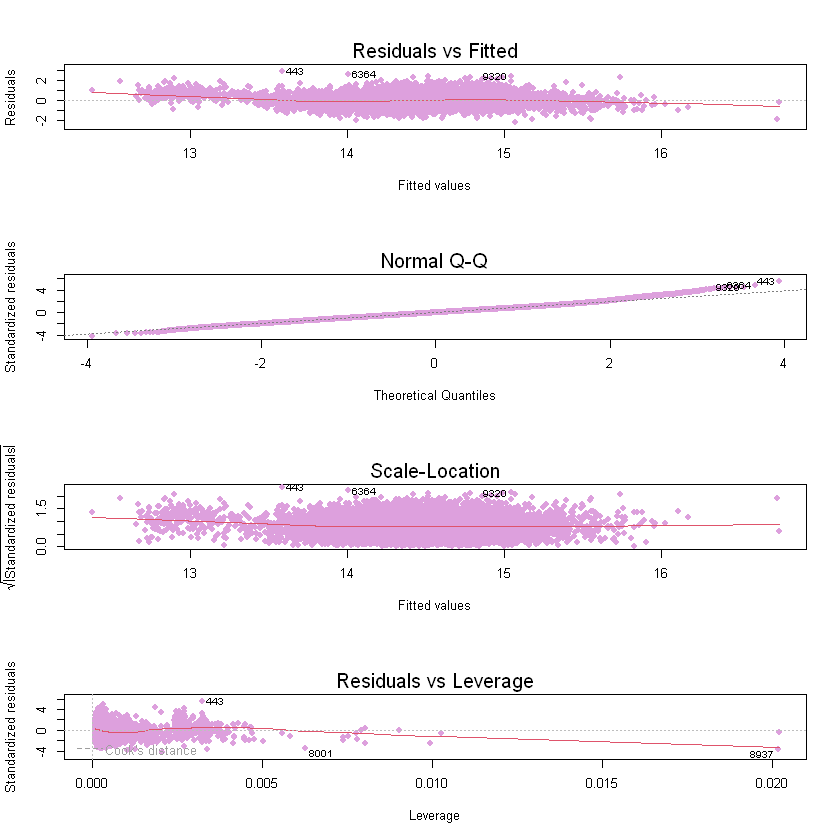

In [49]:
df1=select(df, 가구주_연령, 월세평가금액,주거용전용면적,
            가계지출_소비지출금액, 가계지출_비소비지출금액)
names(df1) <- c('연령','월세','면적','소비지출','비소비지출')

df1=mutate(df1, l소비지출 = log(소비지출), l비소비지출= log(ifelse(비소비지출==0,0.1,비소비지출)))
summary(df1)
fit3<-lm(l소비지출 ~ 연령 + 월세 + 면적 + l비소비지출 , data=df1)
summary(fit3)
par(mfrow=c(4,1))
plot(fit3, col='plum', pch=19)

In [ ]:
# 5번 탭 -----------------------------------------------------------
  h_df=mutate(h_df, l소비지출 = log(소비지출), l비소비지출= log(ifelse(비소비지출==0,0.1,비소비지출)))
  h_fit <- lm(l소비지출 ~ 연령 + 월세 + 면적 + l비소비지출 , data=h_df)
  
  output$regression_result <- renderPrint({
    fit3 <- lm(l소비지출 ~ ., data = h_df[, c("l소비지출", input$indep_vars)])
    summary(fit3)
    })
  
  output$h_plot <- renderPlot({par(mfrow=c(2,2))
    plot(h_fit, col='plum',pch=19)})
  
  output$h_ncvresult <- renderPrint({
    ncvTest(h_fit)
  })
  
  output$h_spreadresult <- renderPrint({
    spreadLevelPlot(h_fit)
  })

In [ ]:
df <- read.csv("C:\\Users\\1\\Desktop\\data.csv", fileEncoding = 'cp949')
# 1. 가구원수 + 주거용전용면적
cor.test(df$가구원수,
         df$주거용전용면적,
         method = c('pearson', 'kendall', 'spearman'))
boxplot(df$주거용전용면적 ~ df$가구원수,
        col = heat.colors(8),
        ylab = '주거용 전용 면적',
        xlab = '가구원 수',
        main = '가구원 수 & 주거용 전용 면적')

# 2. 가구원수 + 가계지출_소비지출금액
cor.test(df$가구원수,
         df$가계지출_소비지출금액,
         method = c('pearson', 'kendall', 'spearman'))
boxplot(df$가계지출_소비지출금액 ~ df$가구원수,
        col = heat.colors(8),
        ylab = '소비 지출 금액',
        xlab = '가구원 수',
        main = '가구원 수 & 소비 지출 금액')

# 3. 가계지출_비소비지출금액 + 가계지출_소비지출_교육비
cor.test(df$가계지출_비소비지출금액,
         df$가계지출_소비지출_교육비,
         method = c('pearson', 'kendall', 'spearman'))
plot(df$가계지출_소비지출_교육비 ~ df$가계지출_비소비지출금액,
     col = '#6B8068',
     pch = 18,
     xlab = '비소비 지출 금액',
     ylab = '교육비')

# 4. 가계지출_비소비지출금액 + 가계지출_소비지출_오락문화_서적구입비
cor.test(df$가계지출_비소비지출금액,
         df$가계지출_소비지출_오락문화_서적구입비,
         method = c('pearson', 'kendall', 'spearman'))
plot(df$가계지출_소비지출_오락문화_서적구입비 ~ df$가계지출_비소비지출금액,
     col = '#6B8068',
     pch = 18,
     xlab = '비소비 지출 금액',
     ylab = '교육비')

# 5. 가계지출_비소비지출금액 + 가계지출_소비지출_보건_의약품구입비
cor.test(df$가계지출_비소비지출금액,
         df$가계지출_소비지출_보건_의약품구입비,
         method = c('pearson', 'kendall', 'spearman'))
plot(df$가계지출_소비지출_보건_의약품구입비 ~ df$가계지출_비소비지출금액,
     col = '#6B8068',
     pch = 18,
     xlab = '비소비 지출 금액',
     ylab = '교육비')


In [61]:
class(df[names(df)[1]])

[1] "data.frame"

In [62]:
class(df[,1])

[1] "integer"

In [63]:
names(df)

[1] "가구원수"                                                       
  [2] "취업인원수"                                                     
  [3] "가구주_연령"                                                    
  [4] "비동거취업미혼자녀수"                                           
  [5] "비동거학업미혼자녀수"                                           
  [6] "비동거기타미혼자녀수"                                           
  [7] "자동차보유대수"                                                 
  [8] "월세평가금액"                                                   
  [9] "전세보증금"                                                     
 [10] "월세사글세"                                                     
 [11] "주거용전용면적"                                                 
 [12] "주택소유유무"                                                   
 [13] "가계지출금액"                                                   
 [14] "가계지출_소비지출금액"                                          
 [15] "가계지출_소비지출_식료품비주류음료구입비"                       
 [16] "가계지출_소비지출_식료품비주류음료_곡물구입비"                  
 [17] "가계지출_소비지출_식료품비주류음료_곡물가공품구입비"            
 [18] "가계지출_소비지출_식료품비주류음료_빵떡류구입비"                
 [19] "가계지출_소비지출_식료품비주류음료_육류구입비"                  
 [20] "가계지출_소비지출_식료품비주류음료_육류가공품구입비"            
 [21] "가계지출_소비지출_식료품비주류음료_신선수산동물구입비"          
 [22] "가계지출_소비지출_식료품비주류음료_염건수산동물구입비"          
 [23] "가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비"      
 [24] "가계지출_소비지출_식료품비주류음료_유제품알구입비"              
 [25] "가계지출_소비지출_식료품비주류음료_유지류구입비"                
 [26] "가계지출_소비지출_식료품비주류음료_과일가공품구입비"            
 [27] "가계지출_소비지출_식료품비주류음료_채소가공품구입비"            
 [28] "가계지출_소비지출_식료품비주류음료_해조가공품구입비"            
 [29] "가계지출_소비지출_식료품비주류음료_당류과자류구입비"            
 [30] "가계지출_소비지출_식료품비주류음료_조미식품구입비"              
 [31] "가계지출_소비지출_식료품비주류음료_기타식품구입비"              
 [32] "가계지출_소비지출_식료품비주류음료_커피차구입비"                
 [33] "가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비"          
 [34] "가계지출_소비지출_주류담배구입비"                               
 [35] "가계지출_소비지출_주류담배_주류구입비"                          
 [36] "가계지출_소비지출_주류담배_담배구입비"                          
 [37] "가계지출_소비지출_의류신발구입비"                               
 [38] "가계지출_소비지출_의류신발_직물및외의구입비"                    
 [39] "가계지출_소비지출_의류신발_내의구입비"                          
 [40] "가계지출_소비지출_의류신발_기타의복구입비"                      
 [41] "가계지출_소비지출_의류신발_의복관련서비스구입비"                
 [42] "가계지출_소비지출_의류신발_신발구입비"                          
 [43] "가계지출_소비지출_의류신발_신발서비스구입비"                    
 [44] "가계지출_소비지출_주거수도광열비"                               
 [45] "가계지출_소비지출_주거수도광열_실제주거비구입비"                
 [46] "가계지출_소비지출_주거수도광열_주택유지수선구입비"              
 [47] "가계지출_소비지출_주거수도광열_상하수도폐기물처리비"            
 [48] "가계지출_소비지출_주거수도광열_기타주거관련서비스구입비"        
 [49] "가계지출_소비지출_주거수도광열_연료비구입비"                    
 [50] "가계지출_소비지출_가정용품가사서비스이용금액"                   
 [51] "가계지출_소비지출_가정용품가사서비스_가구조명구입비"            
 [52] "가계지출_소비지출_가정용품가사서비스_실내장식구입비"            
 [53] "가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액"
 [54] "가계지출_소비지출_가정용품가사서비스_가정용섬유구입비"          
 [55] "가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비"      
 [56] "가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액"    
 [57] "가계지출_소비지출_가정용품가사서비스_가사용품구입비"            
 [58] "가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비"      
 [59] "가계지출_소비지출_가정용품가사서비스_가사소모품구입비"          
 [60] "가계지출_소비지출_가정용품가사서비스_가사서비스금액"            
 [61] "가계지출_소비지출_보건제품구입비"                               
 [62] "가계지출_소비지출_보건_의약품구입비"                            
 [63] "가계지출_소비지출_보건_의료용소모품구입비"                      
 [64] "가계지출_소비지출_보건_보건의료용품기구구입비"                  
 [65] "가계지출_소비지출_보건_외래의료서비스이용금액"                  
 [66] "가계지출_소비지출_보건_치과서비스이용금액"                      
 [67] "가계지출_소비지출_보건_기타의료서비스이용금액"                  
 [68] "가계지출_소비지출_보건_입원서비스이용금액"                      
 [69] "가계지출_소비지출_교통비"                                       
 [70] "가계지출_소비지출_교통_자동차구입비"                            
 [71] "가계지출_소비지출_교통_기타운송기구구입비"                      
 [72] "가계지출_소비지출_교통_운송기구유지수리비"                      
 [73] "가계지출_소비지출_교통_운송기구연료비"                          
 [74] "가계지출_소비지출_교통_기타개인교통서비스이용금액"              
 [75] "가계지출_소비지출_교통_철도운송금액"                            


In [ ]:

h4("최종 모형 결과"),
verbatimTextOutput("h_lm_result"),
plotOutput("h_lm_plot"),
h4("등분산성 검정 결과"),
verbatimTextOutput("h_lm_ncv_test"),
h4("이상점, 영향점"),
verbatimTextOutput("h_outlier"),
plotOutput("h_influence_plot"),
plotOutput("h_influence"),
plotOutput("h_outlier_data"),

In [ ]:
df_subset <- df[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)]
names(df_subset) <- gsub('소비지출 비목별 구성비', '', names(df_subset))
df_subset_sum <- colSums(df_subset)
df_pie <- data.frame(category = names(df_subset_sum), value = df_subset_sum)
colors <- c("#ffeda0","#ffD700","#FFEFD5","#feb24c","#FF8C00","#f03b20","#FA8072","#ffB6c1", "#bd0026","#8b0000", "#6a0e00", "#fff7bc", "#f7f7f7")
ggplot(df_pie, aes(x = "", y = value, fill = category)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = colors,name = "소비지출 구성") +
  theme_void() +
  labs(title = "전체소비지출 비목별 구성비") +
  theme(legend.position = "right") +
  geom_text(aes(label = paste0(round(value/sum(df_subset_sum)*100, 1), "%")), position = position_stack(vjust = 0.5))


In [ ]:
output$l_pie1 <- renderPlot({
  df_subset <- df[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)]
  names(df_subset) <- gsub('소비지출 비목별 구성비', '', names(df_subset))
  df_subset_sum <- colSums(df_subset)
  df_pie <- data.frame(category = names(df_subset_sum), value = df_subset_sum)
  colors <- c("#ffeda0","#ffD700","#FFEFD5","#feb24c","#FF8C00","#f03b20","#FA8072","#ffB6c1", "#bd0026","#8b0000", "#6a0e00", "#fff7bc", "#f7f7f7")
  ggplot(df_pie, aes(x = "", y = value, fill = category)) +
    geom_bar(stat = "identity", width = 1, color = "white") +
    coord_polar("y", start = 0) +
    scale_fill_manual(values = colors,name = "소비지출 구성") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = paste0(round(value/sum(df_subset_sum)*100, 1), "%")), position = position_stack(vjust = 0.5))})




output$l_pie2 <- renderPlot({
  df_grouped <- aggregate(df[,1], by=list(df[,1]), FUN=sum)
  df <- data.frame(category=df_grouped$Group.1, value=df_grouped$x)
  df$category <- as.factor(df$category)
  ggplot(df, aes(x="", y=value/sum(value), fill=category)) +
    geom_col(width=1) +
    coord_polar("y", start=0) +
    theme_void() +
    scale_fill_manual(name = "가구 구성",values = c("#F9FBE7", "#E6EE9C", "#AED581", "#AFB42B", "#59a14f","#33691E","#F0f2f1","#FFF9C4"), 
                      labels = c("1인가구", "2인가구", "3인가구", "4인가구", "5인가구", "6인가구", "7인가구", "8인가구")) +
    theme(legend.position="right") +
    ggtitle("전체 가구원수 비율") +
    geom_text(aes(y = value/sum(value), label = scales::percent(value/sum(value))), 
              position = position_stack(vjust = 0.5), size=4)
  
})




output$l_pie3 <- renderPlot({
  one_data <- df[df$가구원수 == 1, ]
  freq <- colSums(one_data[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)])
  colors <- c("#E1F5Fe", "#B2EBF2", "#81D4FA", "#40C4ff", "#619CFF", "#0277BD", "#00B8D4", "#80DEEa", "#0288D1", "#E0F7FA", "#0072B2", "#01579B","#B3E5FC")
  pie_data <- data.frame(labels = names(freq), values = freq)
  pie_data$percent <- pie_data$values / sum(pie_data$values) * 100
  ggplot(pie_data, aes(x = "", y = values, fill = labels)) +
    geom_bar(width = 0.5, stat = "identity") +
    coord_polar(theta = "y") +
    ggtitle("1인가구 소비지출 비목별 구성비") +
    theme_void() +
    scale_fill_manual(values = colors,name = "소비지출 구성") +
    geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5))
  
})


output$l_pie4 <- renderPlot({
  
  one_data <- df[df$가구원수 == 2, ]
  freq <- colSums(one_data[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)])
  colors <- c("#E1F5Fe", "#B2EBF2", "#81D4FA", "#40C4ff", "#619CFF", "#0277BD", "#00B8D4", "#80DEEa", "#0288D1", "#E0F7FA", "#0072B2", "#01579B","#B3E5FC")
  pie_data <- data.frame(labels = names(freq), values = freq)
  pie_data$percent <- pie_data$values / sum(pie_data$values) * 100

  ggplot(pie_data, aes(x = "", y = values, fill = labels)) +
    geom_bar(width = 0.5, stat = "identity") +
    coord_polar(theta = "y") +
    ggtitle("2인가구 소비지출 비목별 구성비") +
    theme_void() +
    scale_fill_manual(values = colors,name = "소비지출 구성") +
    geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5))
})


output$l_pie5 <- renderPlot({one_data <- df[df$가구원수 == 3, ]
freq <- colSums(one_data[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)])
colors <- c("#E1F5Fe", "#B2EBF2", "#81D4FA", "#40C4ff", "#619CFF", "#0277BD", "#00B8D4", "#80DEEa", "#0288D1", "#E0F7FA", "#0072B2", "#01579B","#B3E5FC")
pie_data <- data.frame(labels = names(freq), values = freq)
pie_data$percent <- pie_data$values / sum(pie_data$values) * 100

ggplot(pie_data, aes(x = "", y = values, fill = labels)) +
  geom_bar(width = 0.5, stat = "identity") +
  coord_polar(theta = "y") +
  ggtitle("3인가구 소비지출 비목별 구성비") +
  theme_void() +
  scale_fill_manual(values = colors,name = "소비지출 구성") +
  geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5))

})




output$l_pie6 <- renderPlot({one_data <- df[df$가구원수 == 4,]
freq <- colSums(one_data[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)])
colors <- c("#E1F5Fe", "#B2EBF2", "#81D4FA", "#40C4ff", "#619CFF", "#0277BD", "#00B8D4", "#80DEEa", "#0288D1", "#E0F7FA", "#0072B2", "#01579B","#B3E5FC")
pie_data <- data.frame(labels = names(freq), values = freq)
pie_data$percent <- pie_data$values / sum(pie_data$values) * 100

ggplot(pie_data, aes(x = "", y = values, fill = labels)) +
  geom_bar(width = 0.5, stat = "identity") +
  coord_polar(theta = "y") +
  ggtitle("4인가구 소비지출 비목별 구성비") +
  theme_void() +
  scale_fill_manual(values = colors,name = "소비지출 구성") +
  geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5))
})


output$l_pie7 <- renderPlot({one_data <- df[df$가구원수 == 5, ]
freq <- colSums(one_data[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)])
colors <- c("#E1F5Fe", "#B2EBF2", "#81D4FA", "#40C4ff", "#619CFF", "#0277BD", "#00B8D4", "#80DEEa", "#0288D1", "#E0F7FA", "#0072B2", "#01579B","#B3E5FC")
pie_data <- data.frame(labels = names(freq), values = freq)
pie_data$percent <- pie_data$values / sum(pie_data$values) * 100

ggplot(pie_data, aes(x = "", y = values, fill = labels)) +
  geom_bar(width = 0.5, stat = "identity") +
  coord_polar(theta = "y") +
  ggtitle("5인가구 소비지출 비목별 구성비") +
  theme_void() +
  scale_fill_manual(values = colors,name = "소비지출 구성") +
  geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5))
})


output$l_pie8 <- renderPlot({one_data <- df[df$가구원수 == 6, ]
freq <- colSums(one_data[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)])
colors <- c("#E1F5Fe", "#B2EBF2", "#81D4FA", "#40C4ff", "#619CFF", "#0277BD", "#00B8D4", "#80DEEa", "#0288D1", "#E0F7FA", "#0072B2", "#01579B","#B3E5FC")
pie_data <- data.frame(labels = names(freq), values = freq)
pie_data$percent <- pie_data$values / sum(pie_data$values) * 100

ggplot(pie_data, aes(x = "", y = values, fill = labels)) +
  geom_bar(width = 0.5, stat = "identity") +
  coord_polar(theta = "y") +
  ggtitle("6인가구 소비지출 비목별 구성비") +
  theme_void() +
  scale_fill_manual(values = colors,name = "소비지출 구성") +
  geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5))

})



output$l_pie9 <- renderPlot({one_data <- df[df$가구원수 == 7, ]
freq <- colSums(one_data[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)])
colors <- c("#E1F5Fe", "#B2EBF2", "#81D4FA", "#40C4ff", "#619CFF", "#0277BD", "#00B8D4", "#80DEEa", "#0288D1", "#E0F7FA", "#0072B2", "#01579B","#B3E5FC")
pie_data <- data.frame(labels = names(freq), values = freq)
pie_data$percent <- pie_data$values / sum(pie_data$values) * 100


ggplot(pie_data, aes(x = "", y = values, fill = labels)) +
  geom_bar(width = 0.5, stat = "identity") +
  coord_polar(theta = "y") +
  ggtitle("7인가구 소비지출 비목별 구성비") +
  theme_void() +
  scale_fill_manual(values = colors,name = "소비지출 구성") +
  geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5))

})



output$l_pie10 <- renderPlot({one_data <- df[df$가구원수 == 8, ]
freq <- colSums(one_data[, c(15,34,37,44,50,61,69,79,83,104,113,116,126)])
colors <- c("#E1F5Fe", "#B2EBF2", "#81D4FA", "#40C4ff", "#619CFF", "#0277BD", "#00B8D4", "#80DEEa", "#0288D1", "#E0F7FA", "#0072B2", "#01579B","#B3E5FC")
pie_data <- data.frame(labels = names(freq), values = freq)
pie_data$percent <- pie_data$values / sum(pie_data$values) * 100

ggplot(pie_data, aes(x = "", y = values, fill = labels)) +
  geom_bar(width = 0.5, stat = "identity") +
  coord_polar(theta = "y") +
  ggtitle("8인가구 소비지출 비목별 구성비") +
  theme_void() +
  scale_fill_manual(values = colors,name = "소비지출 구성") +
  geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5))
})

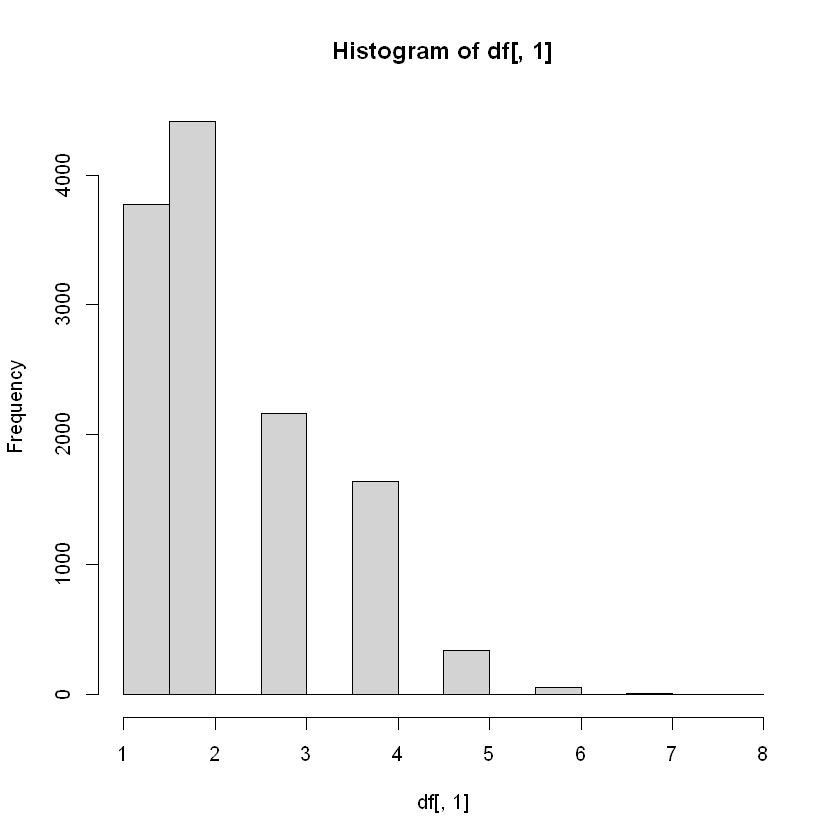

In [64]:
hist(df[,1])

In [65]:
names(df)[1]

[1] "가구원수"

In [70]:
names(df)[1]

[1] "가구원수"

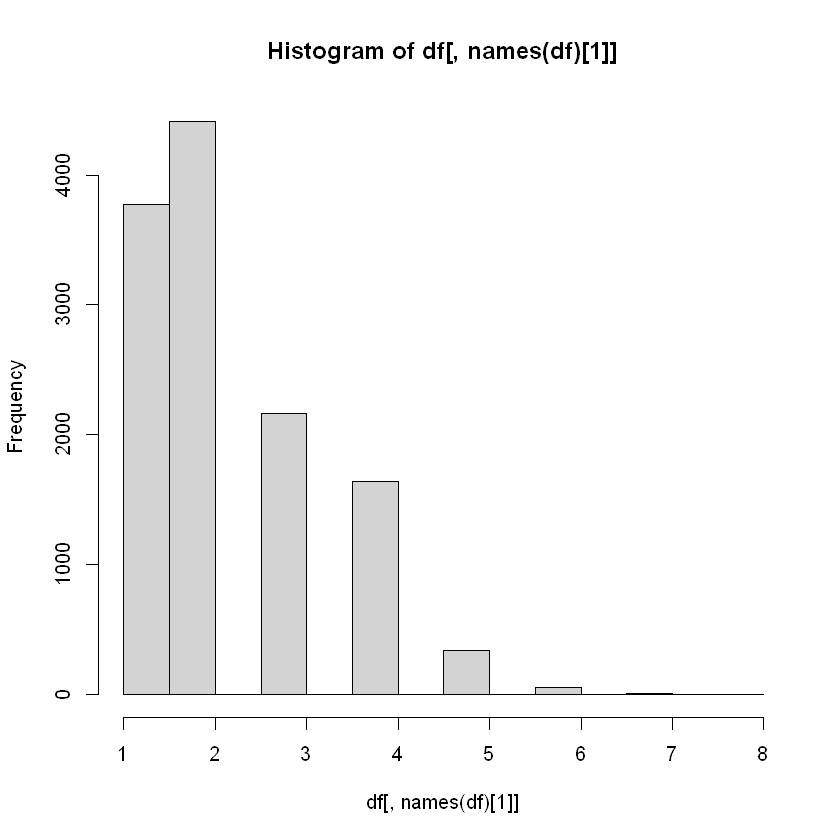

In [68]:
hist(df[,names(df)[1]])